In [2]:
pip install --upgrade pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.3
    Uninstalling pandas-2.3.3:
      Successfully uninstalled pandas-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lifelines 0.30.1 requires pandas<3.0,>=2.1, but you have pandas 3.0.1 which is incompatible.
streamlit 1.45.1 requires pandas<3,>=1.4.0, but you have pandas 3.0.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.13/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
# Importing warnings, suppresing all warnings
import warnings
warnings.filterwarnings('ignore')

# Setting the background of the plots to white
sns.set_style('whitegrid')

In [3]:
# Read the data files
df = pd.read_csv('insurance_data.csv')

In [4]:
# Display the data frame
# First 10 rows
df.head(10)

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,BENEFIT,NON LAPSE GUARANTEED,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date
0,1,1,1,36,F,1,1,A,Annually,Inforce,200000.0,NO NLG,0.0,0,0.0,N,8.000000,9,280.0,11-Aug
1,1,1,1,42,M,1,2,A,Annually,Inforce,100000.0,NO NLG,0.0,0,0.0,N,8.000000,9,200.0,11-Aug
2,1,1,2,40,M,2,3,A,Annually,Lapse,80000.0,NO NLG,0.0,0,0.0,N,8.000000,9,1289.0,11-Aug
3,1,1,3,39,M,1,2,A,Monthly,Lapse,100000.0,NO NLG,0.0,0,0.0,N,8.000000,9,216.0,11-Aug
4,1,1,4,44,M,1,2,A,Annually,Lapse,100000.0,NO NLG,0.0,0,0.0,N,7.916667,8,140.0,11-Sep
5,1,1,1,36,M,2,3,A,Monthly,Lapse,40000.0,NO NLG,0.0,0,0.0,N,7.916667,8,336.0,11-Sep
6,1,1,1,50,F,2,3,A,Monthly,Lapse,20000.0,NO NLG,0.0,0,0.0,N,7.916667,8,537.0,11-Sep
7,1,1,5,42,M,1,2,A,Annually,Lapse,100000.0,NO NLG,0.0,0,0.0,N,7.916667,8,200.0,11-Sep
8,1,1,2,37,M,2,3,A,Annually,Lapse,20000.0,NO NLG,0.0,0,0.0,N,7.833333,8,82.0,11-Oct
9,1,1,3,34,F,2,3,A,Annually,Lapse,20000.0,NO NLG,0.0,0,0.0,N,7.833333,8,73.0,11-Oct


In [6]:
df['Policy Year (Decimal)'].value_counts()

Policy Year (Decimal)
2.666667    4884
3.166667    4319
3.666667    3739
2.750000    3731
4.166667    3417
            ... 
7.750000      86
7.833333      82
7.916667      79
8.000000      76
7.583333      70
Name: count, Length: 97, dtype: int64

In [7]:
df["CHANNEL1"].value_counts()

CHANNEL1
2    108282
6     64958
4      5732
7      2539
8      2266
1      1470
5       239
3        74
Name: count, dtype: int64

In [8]:
df["CHANNEL2"].value_counts()

CHANNEL2
3    113400
2     64960
1      7200
Name: count, dtype: int64

In [9]:
df["CHANNEL3"].value_counts()

CHANNEL3
0     113401
9       6722
11      4670
27      4285
8       3705
       ...  
70         2
73         2
78         1
81         1
82         1
Name: count, Length: 83, dtype: int64

In [10]:
# Get the shape of the data frame
df.shape

(185560, 20)

In [11]:
# Get the data structure
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 185560 entries, 0 to 185559
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CHANNEL1                   185560 non-null  int64  
 1   CHANNEL2                   185560 non-null  int64  
 2   CHANNEL3                   185560 non-null  int64  
 3   ENTRY AGE                  185560 non-null  int64  
 4   SEX                        185560 non-null  str    
 5   POLICY TYPE 1              185560 non-null  int64  
 6   POLICY TYPE 2              185560 non-null  int64  
 7   POLICY TYPE 3              185560 non-null  str    
 8   PAYMENT MODE               185560 non-null  str    
 9   POLICY STATUS              185560 non-null  str    
 10  BENEFIT                    161896 non-null  float64
 11  NON LAPSE GUARANTEED       185560 non-null  str    
 12  SUBSTANDARD RISK           185560 non-null  float64
 13  NUMBER OF ADVANCE PREMIUM  185560 non-nu

In [12]:
# Get the columns of the dataset
df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'Issue Date'],
      dtype='str')

In [13]:
# Checking whether there is any null values
df.isnull().sum()

# As the percentages of total observations
df.isnull().sum()/df.shape[0]*100

CHANNEL1                      0.000000
CHANNEL2                      0.000000
CHANNEL3                      0.000000
ENTRY AGE                     0.000000
SEX                           0.000000
POLICY TYPE 1                 0.000000
POLICY TYPE 2                 0.000000
POLICY TYPE 3                 0.000000
PAYMENT MODE                  0.000000
POLICY STATUS                 0.000000
BENEFIT                      12.752748
NON LAPSE GUARANTEED          0.000000
SUBSTANDARD RISK              0.000000
NUMBER OF ADVANCE PREMIUM     0.000000
INITIAL BENEFIT               0.000000
Full Benefit?                 0.000000
Policy Year (Decimal)         0.000000
Policy Year                   0.000000
Premium                      41.564454
Issue Date                    0.000000
dtype: float64

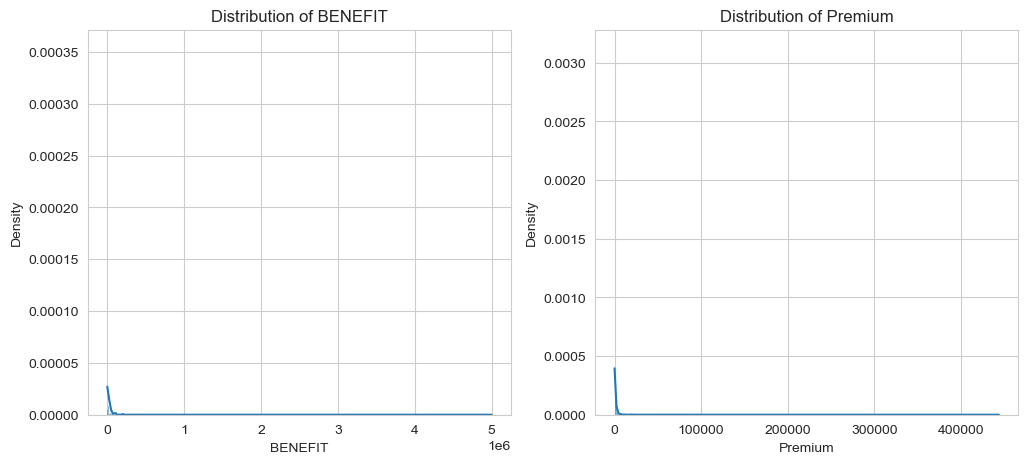

In [14]:
# For missing value, we can do imputation
# Before that, we check the distribution of BENEFIT and Premium
# Hard to see
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['BENEFIT'], kde=True, stat='density')
plt.title('Distribution of BENEFIT')

plt.subplot(1,2,2)
sns.histplot(df['Premium'], kde=True, stat='density')
plt.title('Distribution of Premium')
plt.show()

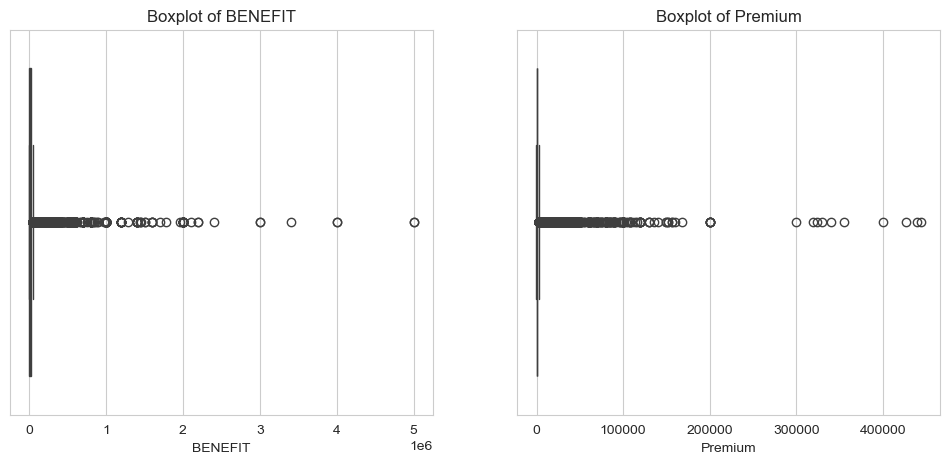

In [15]:
# Plot the boxplot to see the outliers
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=(df['BENEFIT']))
plt.title('Boxplot of BENEFIT')

plt.subplot(1,2,2)
sns.boxplot(x=(df['Premium']))
plt.title('Boxplot of Premium')
plt.show()

In [16]:
# The data is very skewed to the right (contains outliers)
# For imputation, we can use median to fill in the missing values
# df['BENEFIT'].fillna(df['BENEFIT'].median(), inplace=True)
# df['Premium'].fillna(df['Premium'].median(), inplace=True)

In [17]:
# Check for missing values as verification
df.isnull().sum().sum()

np.int64(100791)

In [18]:
# Check for duplicates (in percentages)
df.duplicated().sum()/df.shape[0]*100 

np.float64(6.4043974994610915)

In [19]:
# Since the duplicates are very minimal, we can drop them
df.drop_duplicates(inplace=True)

# Then check the shape again
df.shape

(173676, 20)

In [20]:
# After simple data cleaning
# We check the number of lapse
df['POLICY STATUS'].value_counts()

POLICY STATUS
Lapse        91316
Inforce      62134
Surrender    19581
Death          511
Expired        134
Name: count, dtype: int64

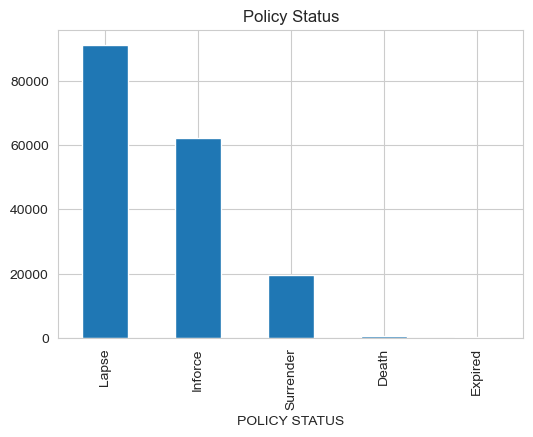

In [21]:
# Plot the counts
plt.figure(figsize=(6,4))
df['POLICY STATUS'].value_counts().plot(kind='bar')
plt.title('Policy Status')
plt.show()

# We only focus on VOLUNTARY lapse rate, including Lapse and Surrender
# We recategorize them into Lapse and Non-Lapse

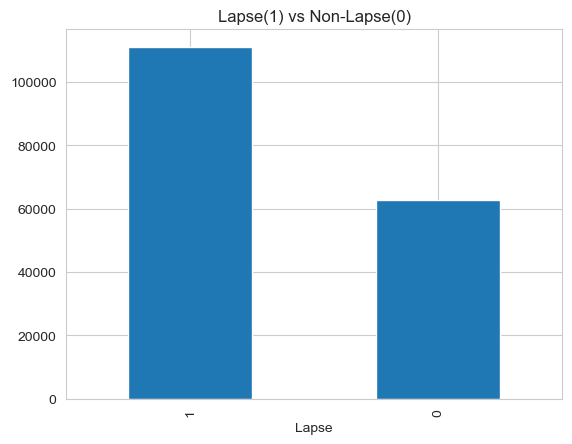

In [22]:
# Grouping for analysis
mapping = {
    'Lapse': 1,
    'Surrender': 1,
    'Inforce': 0,
    'Death': 0,
    'Expired': 0
}

df['Lapse'] = df['POLICY STATUS'].map(mapping)
df['Lapse'].value_counts().plot(kind='bar')
plt.title('Lapse(1) vs Non-Lapse(0)')
plt.show()

# Lapse rate by NLG Type

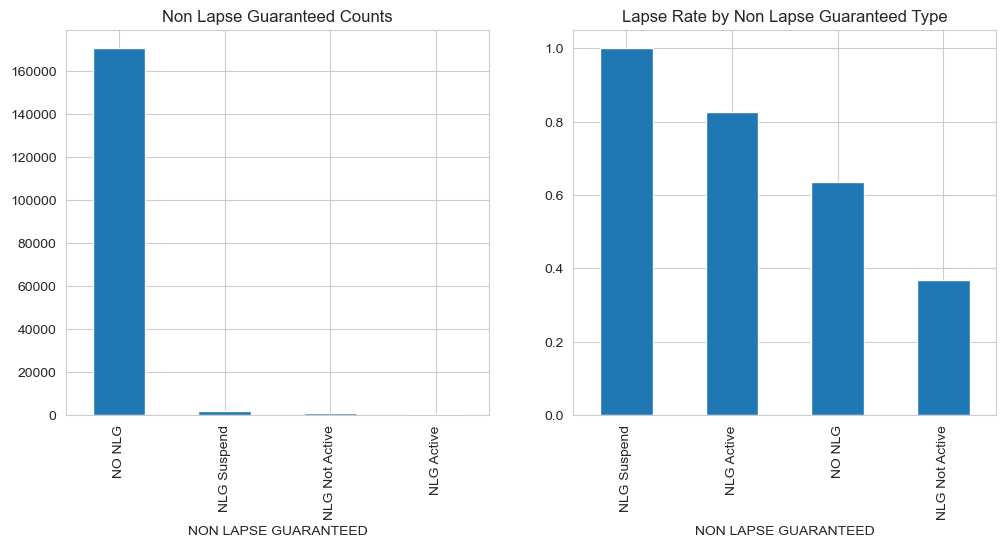

In [23]:
# Non Lapse Guaranteed counts
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['NON LAPSE GUARANTEED'].value_counts().plot(kind='bar')
plt.title('Non Lapse Guaranteed Counts')

plt.subplot(1,2,2)
lapse_by_type = df.groupby('NON LAPSE GUARANTEED')['Lapse'].mean().sort_values(ascending=False)
lapse_by_type.plot(kind='bar')
plt.title('Lapse Rate by Non Lapse Guaranteed Type')
plt.show()

# NLG = feature that keep policy in force even if the cash value drops to 0, 
# provided a minimum premium is paid

# Most of the NLG is NO NLG, which means that when the cash value drops to 0, the policy will lapse
# They do not have protection, and are very sensitive to market conditions/ interest rate changes
# This shows it is important to study how interest rates affects their lapse rates

# Lapse rate exist is every NLG category

# Substandard Risk Analysis

In [24]:
df["SUBSTANDARD RISK"].value_counts()

SUBSTANDARD RISK
 0.00      173006
 50.00        243
 100.00       118
 75.00         64
 49.99         44
            ...  
-49.99          1
 11.63          1
 56.96          1
 16.60          1
 12.74          1
Name: count, Length: 64, dtype: int64

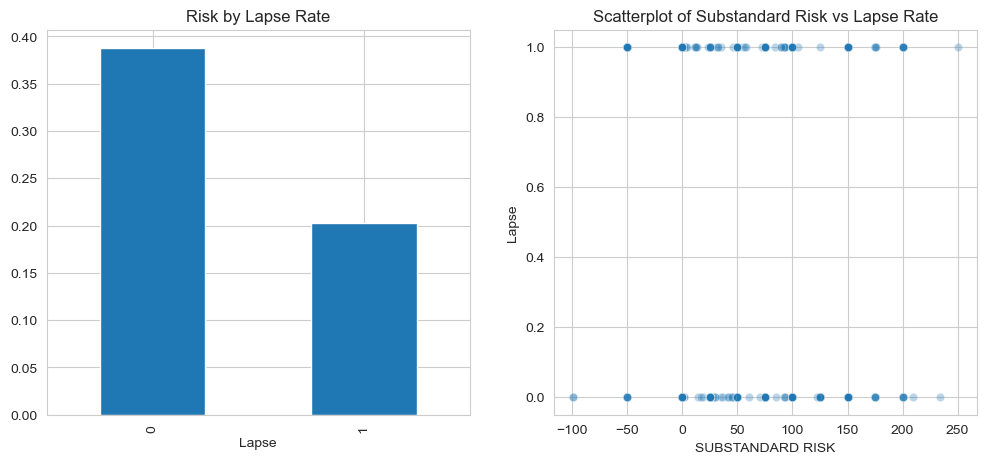

In [25]:
# Check with Substandard Risk
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
lapse_by_risk = df.groupby('Lapse')['SUBSTANDARD RISK'].mean().sort_values(ascending=False)
lapse_by_risk.plot(kind='bar')
plt.title('Risk by Lapse Rate')

# Scatterplot
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='SUBSTANDARD RISK', y='Lapse', alpha=0.3)
plt.title('Scatterplot of Substandard Risk vs Lapse Rate')
plt.show()

# No obvious trend between Substandard Risk and Lapse Rate

In [26]:
# I was interested in exporing the Benefit to Initial Benefit ratio
# If there is a decline in the ratio, it means that Benefit is reducing
# A strong sign of lapse risk

df['INITIAL BENEFIT'].describe()

count    173676.000000
mean        181.194289
std        3012.901561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      266017.236800
Name: INITIAL BENEFIT, dtype: float64

<Axes: xlabel='INITIAL BENEFIT'>

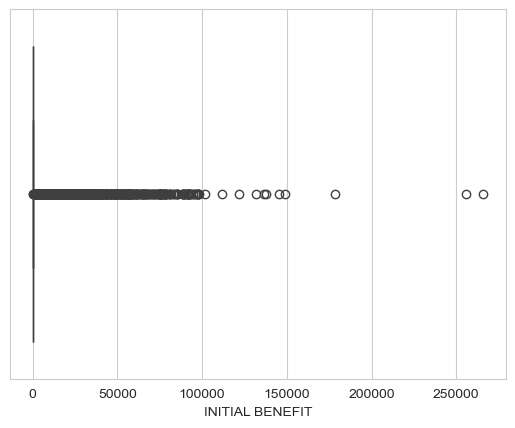

In [27]:
sns.boxplot(x=(df['INITIAL BENEFIT']))
# The initial benefit also have outliers (a lot)
# Might not be suitable to compute the ratios for analysis

Text(0.5, 1.0, 'Lapse Rate by Full Benefit coverage')

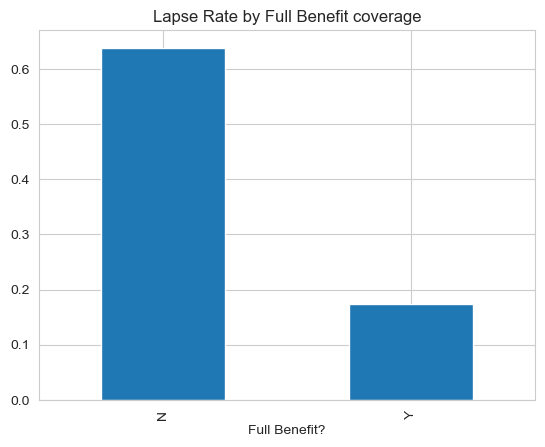

In [28]:
# Check with Full Benefit?
lapse_by_risk = df.groupby('Full Benefit?')['Lapse'].mean().sort_values(ascending=False)
lapse_by_risk.plot(kind='bar')
plt.title('Lapse Rate by Full Benefit coverage')

# Full Benefit coverage have lower lapse rate   

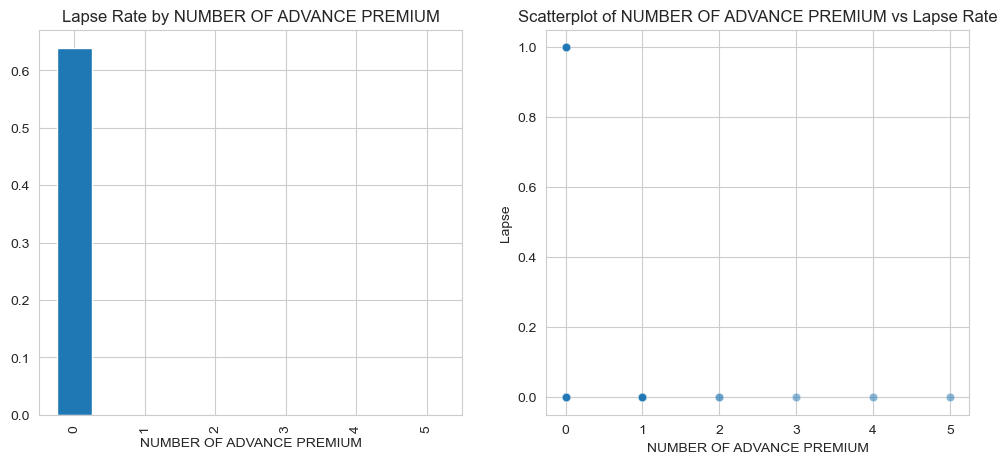

In [29]:
# Check with NUMBER OF ADVANCE PREMIUM?
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
lapse_by_advance = df.groupby('NUMBER OF ADVANCE PREMIUM')['Lapse'].mean().sort_values(ascending=False)
lapse_by_advance.plot(kind='bar')
plt.title('Lapse Rate by NUMBER OF ADVANCE PREMIUM')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='NUMBER OF ADVANCE PREMIUM', y='Lapse', alpha=0.3)
plt.title('Scatterplot of NUMBER OF ADVANCE PREMIUM vs Lapse Rate')
plt.show()

# Individuals who do advance premiums do not lapse

In [30]:
df['NUMBER OF ADVANCE PREMIUM'].value_counts()

NUMBER OF ADVANCE PREMIUM
0    173603
1        64
2         3
5         2
3         2
4         2
Name: count, dtype: int64

In [31]:
# Reformat the Issue Date into YYYY-MM-01 format
# Since there is no actual issue date, we assume the day to be 1
df['Issue Date'] = pd.to_datetime(df['Issue Date'], format='%y-%b')

In [32]:
# Adding a new column to compute the actual ending date of the policy
from dateutil.relativedelta import relativedelta

# Function to calculate the current policy date
def calculate_dates(row):
    issue_date = row['Issue Date']
    decimal_year = row['Policy Year (Decimal)']
    
    # Calculate whole years and remaining decimal for months
    years = int(decimal_year)
    remaining_months_decimal = (decimal_year - years) * 12
    months = round(remaining_months_decimal)
    
    # Compute the "Effective Date" represented by this row
    current_eval_date = issue_date + relativedelta(years=years, months=months)

    return current_eval_date

df['Current Policy Date'] = df.apply(calculate_dates, axis=1)
df.head()

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,...,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date,Lapse,Current Policy Date
0,1,1,1,36,F,1,1,A,Annually,Inforce,...,0.0,0,0.0,N,8.000000,9,280.0,2011-08-01,0,2019-08-01
1,1,1,1,42,M,1,2,A,Annually,Inforce,...,0.0,0,0.0,N,8.000000,9,200.0,2011-08-01,0,2019-08-01
2,1,1,2,40,M,2,3,A,Annually,Lapse,...,0.0,0,0.0,N,8.000000,9,1289.0,2011-08-01,1,2019-08-01
3,1,1,3,39,M,1,2,A,Monthly,Lapse,...,0.0,0,0.0,N,8.000000,9,216.0,2011-08-01,1,2019-08-01
4,1,1,4,44,M,1,2,A,Annually,Lapse,...,0.0,0,0.0,N,7.916667,8,140.0,2011-09-01,1,2019-08-01


In [33]:
df['Current Policy Date'].value_counts()
# All ending date is 2019-08-01.

Current Policy Date
2019-08-01    173676
Name: count, dtype: int64

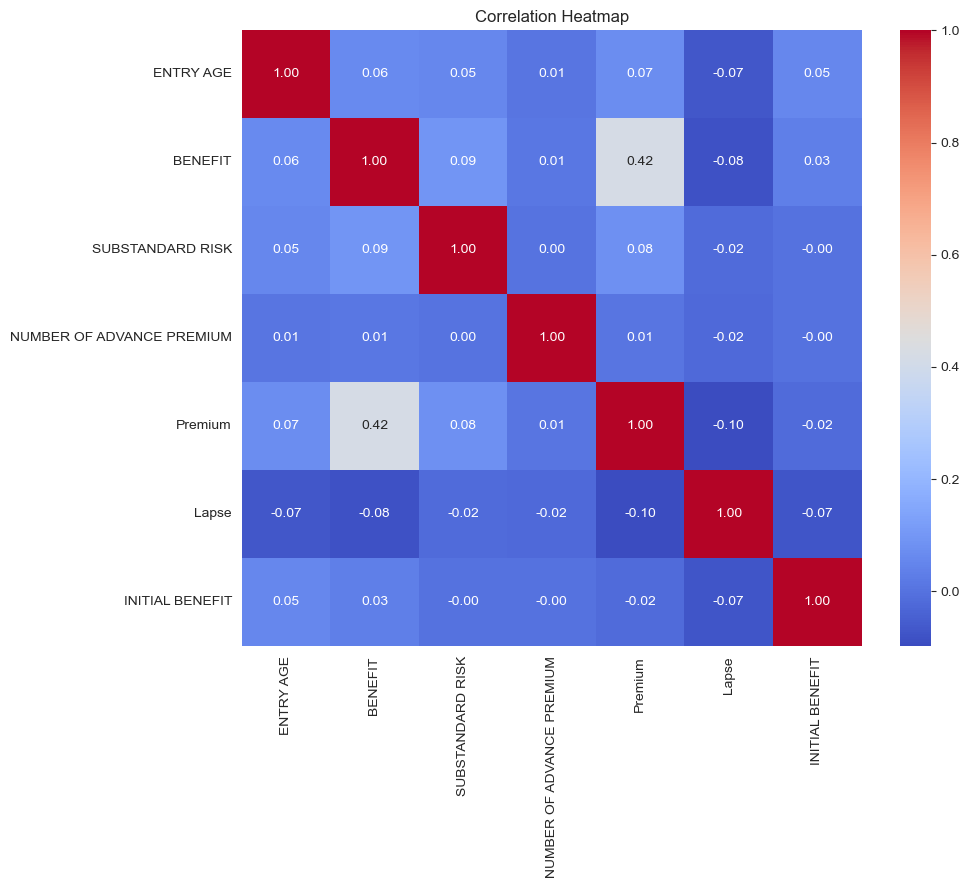

In [34]:
# Select only relevant columns for correlation analysis
df_corr = df[['ENTRY AGE','BENEFIT','SUBSTANDARD RISK',
              'NUMBER OF ADVANCE PREMIUM','Premium','Lapse','INITIAL BENEFIT']]

# Plot a heatmap to understand the correlations
plt.figure(figsize=(10,8))
corr = df_corr.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Very low correlations between features and Lapse

In [35]:
df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'Issue Date',
       'Lapse', 'Current Policy Date'],
      dtype='str')

In [36]:
# Was thinking of only keep
# 'ENTRY AGE', 'SEX', 'PAYMENT MODE', 'POLICY STATUS',
# 'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
# 'NUMBER OF ADVANCE PREMIUM', 'Full Benefit?',
# 'Premium', 'Issue Date','Current Policy Date'
# 'Lapse' as our respond variables

# Imputation of Missing NA values in Premium and Benefits

In [37]:
# Load necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler


In [38]:
df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'Issue Date',
       'Lapse', 'Current Policy Date'],
      dtype='str')

In [39]:
# --- 1. SETUP & DATA SPLIT (The 70/30 Rule) ---
# Filter for rows where both columns are present to create a "Ground Truth" set
complete_df = df.dropna(subset=['Premium', 'BENEFIT']).copy()

# Split into 70% Training and 30% Validation
train_df, val_df = train_test_split(complete_df, test_size=0.3, random_state=42)

# Create a 'Test' set with artificial NAs to measure accuracy
val_with_holes = val_df.copy()
# Hide 10% of Premiums and 10% of Benefits randomly
val_with_holes.loc[val_with_holes.sample(frac=0.1).index, 'Premium'] = np.nan
val_with_holes.loc[val_with_holes.sample(frac=0.1).index, 'BENEFIT'] = np.nan

In [40]:
# Check to make sure there is NaN for both Premium and BENEFIT
val_with_holes.head(30)

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,...,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date,Lapse,Current Policy Date
138863,6,2,12,35,M,6,30,E,Monthly,Surrender,...,0.0,0,0.0,N,4.083333,5,44.0,2015-07-01,1,2019-08-01
174703,6,2,10,31,F,7,39,A,Monthly,Lapse,...,0.0,0,0.0,N,4.000000,5,172.0,2015-08-01,1,2019-08-01
168738,6,2,46,28,M,6,34,E,Monthly,Surrender,...,0.0,0,0.0,N,3.500000,4,96.0,2016-02-01,1,2019-08-01
127191,6,2,11,33,M,3,5,A,Monthly,Inforce,...,0.0,0,0.0,N,2.750000,3,480.0,2016-11-01,0,2019-08-01
52234,2,3,0,6,F,3,5,A,Monthly,Surrender,...,0.0,0,0.0,N,4.500000,5,960.0,2015-02-01,1,2019-08-01
101210,2,3,0,27,F,3,5,A,Quaterly,Inforce,...,0.0,0,0.0,N,4.333333,5,400.0,2015-04-01,0,2019-08-01
155844,6,2,36,32,M,7,39,A,Monthly,Lapse,...,0.0,0,0.0,N,3.416667,4,109.0,2016-03-01,1,2019-08-01
93087,2,3,0,34,M,12,58,A,Monthly,Inforce,...,0.0,0,0.0,N,0.916667,1,NaN,2018-09-01,0,2019-08-01
152467,6,2,41,26,F,7,39,A,Monthly,Surrender,...,0.0,0,0.0,N,3.500000,4,214.0,2016-02-01,1,2019-08-01
164066,6,2,15,24,F,15,63,A,Monthly,Inforce,...,0.0,0,0.0,N,1.000000,2,240.0,2018-08-01,0,2019-08-01


In [41]:
# --- 2. METHOD: KNN (Handles both simultaneously) ---
# Try k=20. 
# We scale the data first because KNN is distance-based.
scaler = StandardScaler()

# Important: We fit the scaler only on the training data to avoid data leakage, 
# then transform both train and validation sets
train_scaled = scaler.fit_transform(train_df[['Premium', 'BENEFIT']])
val_scaled = scaler.transform(val_with_holes[['Premium', 'BENEFIT']])

# KNN Imputer (Uses mean of neighbors by default)
knn_imputer = KNNImputer(n_neighbors=20)
val_imputed_knn = knn_imputer.fit_transform(val_scaled)

# Inverse transform back to original scale
val_imputed_knn = pd.DataFrame(scaler.inverse_transform(val_imputed_knn), 
                               columns=['Premium', 'BENEFIT'], 
                               index=val_with_holes.index)

In [42]:
# --- 3. METHOD: Quantile Regression (Separate Models) ---
# Model A: Predict Premium using Benefit
mod_p = smf.quantreg('Premium ~ BENEFIT', train_df).fit(q=0.5) # Median

# Model B: Predict Benefit using Premium
mod_b = smf.quantreg('BENEFIT ~ Premium', train_df).fit(q=0.5) # Median

# Apply predictions to fill NAs
val_qr = val_with_holes.copy()
val_qr['Premium'] = val_qr['Premium'].fillna(mod_p.predict(val_qr))
val_qr['BENEFIT'] = val_qr['BENEFIT'].fillna(mod_b.predict(val_qr))

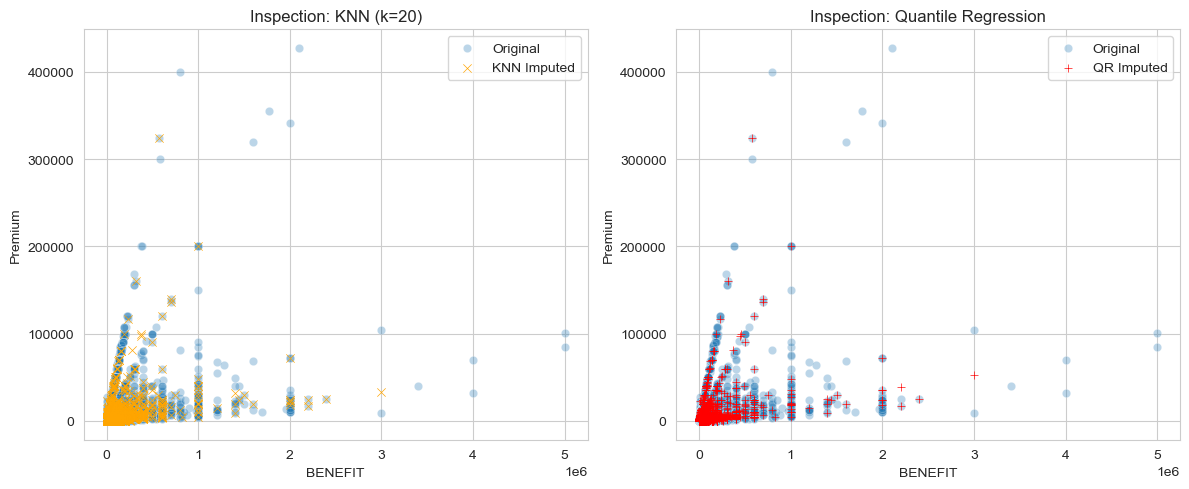

In [43]:
# --- 4. PROFESSOR'S INSPECTION: Joint Distribution ---
plt.figure(figsize=(12, 5))

# Plot 1: Original vs KNN Imputed
plt.subplot(1, 2, 1)
sns.scatterplot(data=complete_df, x='BENEFIT', y='Premium', alpha=0.3, label='Original')
sns.scatterplot(data=val_imputed_knn, x='BENEFIT', y='Premium', color='orange', marker='x', label='KNN Imputed')
plt.title("Inspection: KNN (k=20)")

# Plot 2: Original vs Quantile Regression Imputed
plt.subplot(1, 2, 2)
sns.scatterplot(data=complete_df, x='BENEFIT', y='Premium', alpha=0.3, label='Original')
sns.scatterplot(data=val_qr, x='BENEFIT', y='Premium', color='red', marker='+', label='QR Imputed')
plt.title("Inspection: Quantile Regression")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Inspection: KNN (k=20)')

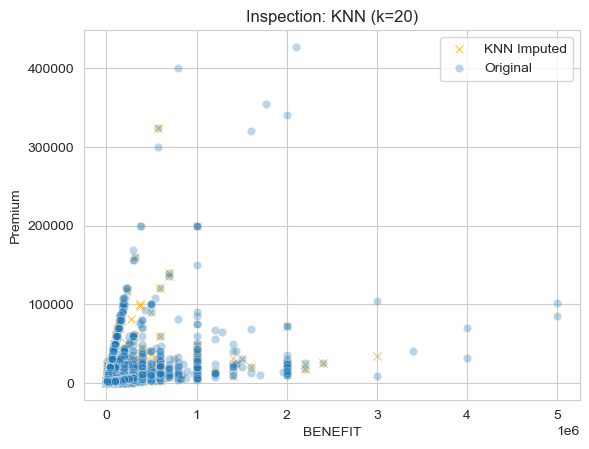

In [47]:
sns.scatterplot(data=val_imputed_knn, x='BENEFIT', y='Premium', color='orange', marker='x', label='KNN Imputed')
sns.scatterplot(data=complete_df, x='BENEFIT', y='Premium', alpha=0.3, label='Original')
plt.title("Inspection: KNN (k=20)")


In [44]:
# Both methods successfully captured the positive correlation between Benefit and Premium. 
# KNN provided a more natural distribution of imputed values that 'blended in' with the existing data cloud. 
# Quantile Regression provided a robust trend line that ignored extreme outliers, 
# though it resulted in more rigid, linear imputed values.

# Quantile regression tend to impute a lot of values along the same linear line
# KNN iputation provided a more natural distribution (not speific trend, but instead random noise)

In [53]:
# Compute MSE to compare between two methods
from sklearn.metrics import mean_squared_error

# 1. Identify where we "punched holes" (the indices of the missing values)
premium_mask = val_with_holes['Premium'].isna()
benefit_mask = val_with_holes['BENEFIT'].isna()

# 2. Extract Ground Truth (Actual values we hid)
true_premium = val_df.loc[premium_mask, 'Premium']
true_benefit = val_df.loc[benefit_mask, 'BENEFIT']

# 3. Extract KNN Predictions for those specific holes
knn_pred_premium = val_imputed_knn.loc[premium_mask, 'Premium']
knn_pred_benefit = val_imputed_knn.loc[benefit_mask, 'BENEFIT']

# 4. Extract Quantile Regression Predictions for those specific holes
qr_pred_premium = val_qr.loc[premium_mask, 'Premium']
qr_pred_benefit = val_qr.loc[benefit_mask, 'BENEFIT']

# 5. Calculate MSE for Premium
mse_knn_p = mean_squared_error(true_premium, knn_pred_premium)

# Quantile regression could not predict rows where both Premium and Benefit were missing, so we need to filter those out before calculating MSE
# We filter both 'true' and 'pred' to only include rows where the prediction is NOT NaN
mask_p = qr_pred_premium.notna()
mse_qr_p = mean_squared_error(true_premium[mask_p], qr_pred_premium[mask_p])

# 6. Calculate MSE for Benefit
mse_knn_b = mean_squared_error(true_benefit, knn_pred_benefit)

# Quantile regression could not predict rows where both Premium and Benefit were missing, so we need to filter those out before calculating MSE
# We filter both 'true' and 'pred' to only include rows where the prediction is NOT NaN
mask_b = qr_pred_benefit.notna()
mse_qr_b = mean_squared_error(true_benefit[mask_b], qr_pred_benefit[mask_b])

In [48]:
df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'Issue Date',
       'Lapse', 'Current Policy Date'],
      dtype='str')

In [50]:
premium_mask

138863    False
174703    False
168738    False
127191    False
52234     False
          ...  
183226    False
176530    False
11633     False
42716     False
149835    False
Name: Premium, Length: 25018, dtype: bool

In [54]:
# Compute the median for  Premium and Benefit to fill in the missing values - check the MSE
# 1. Calculate the Median from the TRAINING set only
# (We use training data to avoid "data leakage")
train_median_premium = train_df['Premium'].median()
train_median_benefit = train_df['BENEFIT'].median()

# 2. Create "Predictions" using the Median
# For every 'hole' we made in the validation set, we just guess the median
median_pred_premium = np.full(shape=true_premium.shape, fill_value=train_median_premium)
median_pred_benefit = np.full(shape=true_benefit.shape, fill_value=train_median_benefit)

# 3. Calculate MSE for Median
mse_median_p = mean_squared_error(true_premium, median_pred_premium)
mse_median_b = mean_squared_error(true_benefit, median_pred_benefit)

In [55]:
sum(((knn_pred_benefit - true_benefit) ** 2))/len(benefit_mask)


455840786.40556586

In [56]:
sum(((knn_pred_benefit - true_benefit) ** 2))/np.var(true_benefit)

1939.6505589854003

In [57]:
df.isna().sum()

CHANNEL1                         0
CHANNEL2                         0
CHANNEL3                         0
ENTRY AGE                        0
SEX                              0
POLICY TYPE 1                    0
POLICY TYPE 2                    0
POLICY TYPE 3                    0
PAYMENT MODE                     0
POLICY STATUS                    0
BENEFIT                      21548
NON LAPSE GUARANTEED             0
SUBSTANDARD RISK                 0
NUMBER OF ADVANCE PREMIUM        0
INITIAL BENEFIT                  0
Full Benefit?                    0
Policy Year (Decimal)            0
Policy Year                      0
Premium                      72390
Issue Date                       0
Lapse                            0
Current Policy Date              0
dtype: int64

In [ ]:
# Compare everything (using RMSE for easier reading in dollar amounts)
print("--- ACCURACY COMPARISON (RMSE) ---")
print(f"Median Baseline Premium RMSE: ${np.sqrt(mse_median_p):,.2f}")

print("--- MSE Comparison: PREMIUM ---")
print(f"KNN Imputation MSE: {mse_knn_p:,.2f}")
print(f"Quantile Reg MSE:   {mse_qr_p:,.2f}")
print(f"Median Baseline MSE:   {mse_median_p:,.2f}")

print("\n--- MSE Comparison: BENEFIT ---")
print(f"KNN Imputation MSE: {mse_knn_b:,.2f}")
print(f"Quantile Reg MSE:   {mse_qr_b:,.2f}")
print(f"Median Baseline MSE:   {mse_median_b:,.2f}")

--- ACCURACY COMPARISON (RMSE) ---
Median Baseline Premium RMSE: $4,252.58
--- MSE Comparison: PREMIUM ---
KNN Imputation MSE: 13,253,406.88
Quantile Reg MSE:   15,849,869.39
Median Baseline MSE:   18,084,426.56

--- MSE Comparison: BENEFIT ---
KNN Imputation MSE: 4,329,514,243.58
Quantile Reg MSE:   5,096,555,480.74
Median Baseline MSE:   5,214,829,234.41


In [ ]:
# For both prediction, I have the lowest MSE for both Premium and Benefit for KNN imputation method.
# Now I will apply that to the rest of the dataset to impute the missing values, and then use the imputed dataset to do further analysis on lapse rates.

In [ ]:
# Total Missing Values
df['Premium'].isna().sum() + df['BENEFIT'].isna().sum()

np.int64(100791)

In [ ]:
# Prepare your data
# We only use the columns involved in the calculation
cols_to_fix = ['Premium', 'BENEFIT']
data_for_imputation = df[cols_to_fix].copy()

# 2. Scaling is CRITICAL for KNN
# KNN uses distance, so we must put Premium and Benefit on the same scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_imputation)

# 3. Initialize and Run the Best Method (k=20)
# This will find the 20 nearest neighbors and fill EVERY NaN
final_imputer = KNNImputer(n_neighbors=20)
imputed_array = final_imputer.fit_transform(scaled_data)

# 4. Convert back to original scale and put back into the DataFrame
imputed_data = scaler.inverse_transform(imputed_array)
df[cols_to_fix] = imputed_data

# 5. Final Verification
# print(f"Missing values in Premium: {df['Premium'].isna().sum()}")
# print(f"Missing values in Benefit: {df['BENEFIT'].isna().sum()}")

In [ ]:
print(f"Missing values in Premium: {df['Premium'].isna().sum()}")
print(f"Missing values in Benefit: {df['BENEFIT'].isna().sum()}")

Missing values in Premium: 0
Missing values in Benefit: 0


In [ ]:
df.isna().sum()

CHANNEL1                     0
CHANNEL2                     0
CHANNEL3                     0
ENTRY AGE                    0
SEX                          0
POLICY TYPE 1                0
POLICY TYPE 2                0
POLICY TYPE 3                0
PAYMENT MODE                 0
POLICY STATUS                0
BENEFIT                      0
NON LAPSE GUARANTEED         0
SUBSTANDARD RISK             0
NUMBER OF ADVANCE PREMIUM    0
INITIAL BENEFIT              0
Full Benefit?                0
Policy Year (Decimal)        0
Policy Year                  0
Premium                      0
Issue Date                   0
dtype: int64

In [ ]:
df.to_csv('cleaned_data.csv', index=False)